# **Price Prediction Model for European Airbnb Listings**

Developed by: Patrick Helcl

Written by: Kai Stern

# Abstract 
We aim to build a model that predicts the price of Airbnbs in Europe using a data set from Kaggle which details the features and pricings of Airbnb’s in various European countries and cities. This model would help people looking to travel quickly determine if an Airbnb is fairly priced and the pricing trends of Airbnbs in general areas. The model would also help owners of Airbnbs determine prices according to their circumstances and attributes. The data used includes various statistics of Airbnb features (e.g number of rooms, price, has superhost, etc). Due to our datasets inclusion of boolean, categorical, and numerical data columns we plan to use a random forest regressor model which we feel will best handle these features. We will be building a model that predicts the price of the Airbnb and compare our model’s results with the price column in our dataset. The specific model will be chosen after feature selection, hyperparameter tuning, and comparison of several algorithms. Algorithms will be compared using appropriate loss functions.  

# Background

Airbnb’s rapid growth over the last 15 years has turned the company into one of the three pillars of the short term rental market, joining traditional renting and the hospitality industry.There are over 5 million Airbnbs worldwide spanning 81,000 cities and 191 countries<a name="barron"></a>[<sup>[1]</sup>](#barronnote). As Airbnb’s popularity first began to rise in the early 2010s, research on the company generally focused on its viability as a competitor in the short term rental sector and what effects the popular new accommodation sharing app would have on jobs and tourism in major cities<a name="Nguyen"></a>[<sup>[4]</sup>](#Nguyennote). Findings correlated increases in the number of Airbnb listings with small decreases in hotel revenue and increases in traditional rent rates <a name="Kerren"></a>[<sup>[2,4]</sup>](#Kerrennote). Due to the popularity of Airbnb as a product, more recent research has focused on exploring how Airbnb pricing can be used as an indicator for the health of the tourism and rental economies in cities<a name="Sans"></a>[<sup>[6]</sup>](#Sansnote). Other research has compared differing spatial distributions of Airbnbs and hotels and how this difference changes crowd size and interaction between locals and tourists in cities<a name="Perez"></a>[<sup>[3]</sup>](#Pereznote). Airbnb has a remarkable ability to capitalize on proximity to tourist attractions relative to hotels<a name="Gutierrez"></a>[<sup>[5]</sup>](#Gutierreznote).This research also developed tools to chart where cities have seen the largest tourist pressure related to Airbnb growth<a name="Gutierrez"></a>[<sup>[5]</sup>](#Gutierreznote). The project we intend to complete focuses on helping hosts and users of Airbnb determine fair pricing for lodging based on features of the homes or apartments.This service would help hosts ensure they aren’t undervaluing or overvaluing their services and give tourists the ability to evaluate whether pricing is fair when looking for an Airbnb to stay in.

# Problem Statement

The problem that we are trying to solve is the difficulty airbnb users have when trying to rent an airbnb. More specifically, there are many factors when trying to figure out which airbnb to book in an area (e.g. policies enforced, how many rooms, reading reviews, etc.). This takes a lot of time and it is very rigorous to figure out whether or not the nightly rate of the airbnb is overpriced or not. Another problem is that airbnb owners may not know what to price their airbnb. They need to make sure the price is high enough to make a good profit but at the same time low enough that people will rent their airbnb. Simply put, the problem is the difficulty and time it takes to accurately value an airbnb. One ML-relevant solution is to use certain features of Airbnbs and try multiple algorithm types to find the best model that would accurately predict the price of a given airbnb.This would allow airbnb owners and renters to get a good estimate of what they should pay or be paid for a specific airbnb. We can measure this problem by looking at the price an airbnb is valued at. This problem can be replicated as there are several Airbnbs in several cities/countries. 

# Data

Link to dataset used on kaggle: https://www.kaggle.com/datasets/dipeshkhemani/airbnb-cleaned-europe-dataset?select=Aemf1.csv

Our dataset initially has 40k observations, spanning 19 variables (columns): 
Name of the city, Price of Airbnb, If it is weekday or weekend, Room type, Type of Airbnb (e.g. Apartment, house etc.), Private Room, Shared Room,The Person Capacity of Airbnb, If the Airbnb host has Superhost or not, If the Airbnb has multiple rooms, Business (If the owner of the listing has more than 4 listings total), Cleanliness Rating, Guest Satisfaction, Bedrooms (number of bedrooms), Distance to City Center (km), Metro Distance (km) (distance to subway/metro), Attraction Index (score based on proximity to tourist attractions), Normalised Attraction Index,  Restaurant Index (score based on how many/popularity of restaurants nearby), Normalised Restaurant index. 
The initial features are partially changed throughout our machine learning process as we one hot encoded the categorical columns, and dropped “Normalised Attraction Index”, “Normalised Restaurant Index", since the pipeline we plan to use later normalizes all scalars anyways. Some of these variables have many data inputs, and each of these inputs is an observation. Prior to starting our analysis we presumed some particularly critical variables would be the city the airbnb is in, whether it is a weekday or not, the guest satisfaction, and the amount of bedrooms. Categorical variables such as city and weekday/weekend columns will be one-hot encoded and the numerical data will be normalized to avoid scale differences and aid identifying feature importance. As we perform feature selection, feature selected models may drop some data that is unnecessary for testing purposes.


In [1]:
# Raw data and necessary imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

airbnb = pd.read_csv('https://raw.githubusercontent.com/COGS118A/Group023-SP23/main/Aemf1.csv')

airbnb = airbnb.drop(columns=['Normalised Attraction Index', 'Normalised Restraunt Index'])
airbnb.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,98.253896
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,837.280757
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,95.386955
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,875.033098
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,815.305740


# Proposed Solution

To help alleviate the uncertainty associated with picking and pricing airbnb’s, we propose a model to meaningfully predict price listings by leveraging features, previously mentioned in the data section above, from our dataset. Our plan is to use a decision tree regressor as our base model. Decision tree regressors are built for continuous data and can capture non-linear relationships while remaining interpretable. However decision tree regressors are very sensitive to the training data which can lead to overfitting and high variance. For this reason we aim to build upon the base model and use a random forest. Random forests are ensembles made up of decision trees that aggregate the outputs of the many decision trees to help solve the issues with overfitting and high variability. A random forest regressor is a random forest made up of decision tree regressors allowing it to work with continuous data. We expect random forest regressors to perform better on test set data as they are more generalizable. We will perform feature selection using recursive feature elimination cross validation and grid search validation for hyperparameter tuning. Comparison between models will be mainly evaluated using mean absolute error (MAE) with a secondary comparison using r2 score. All of our code is available to provide reproducibility of our results. Reproduced results should be based on data from the nine cities in our 

# Evaluation Metrics

We decided to evaluate our algorithms/models based on two error metrics: r2 score and mean absolute error (MAE). Our model is going to output a continuous value (predicted price) and these error metrics are designed for evaluating models with continuous outputs. The r2 score metric returns a value between 0 and 1 and describes how well the model explains variability in the target variable. A higher r2-score value means the model explains much of the variability in the target variable while a low r2-score value means the opposite. In short an r2 value closer to 1 is more desirable. MAE is a measure of the difference between predicted and actual price values. MAE works by summing the absolute value of distance between its prediction and actual value. Due to the way it is calculated, MAE is more robust to outliers as opposed to error metrics like RMSE. Using both error metrics will give us a solid basis to compare our algorithms and models throughout the process of selecting our final model. While all error metrics are useful, we feel the most important for our specific problem is MAE as housing prices very often have outliers and MAE will give us a more accurate measurement of our models effectiveness.

# Results

Our goal was to create a model that could predict the price listing of an airbnb based on features from our dataset. To this end, we plan on using regression models as our outputs should be a number, not a category (thus we are not using classifier models). The regression models we plan on looking into are decision tree regressors and random forest regressors. This is because decision trees are easy to interpret, thus would make a good base model. Furthermore, Random Forests work similarly to Decision trees so it is fair to use the same features across both models  for comparison. Due to these properties, only one round of feature selection will be used. We expect the random forest regressor to perform better, however if they have similar accuracies and the random forest regressor takes too long to train and test, it may be more beneficial to use a decision tree as our model.

We first fit and trained our models on all the features to look into which model performs better, with all default parameters. This is a preliminary look into the models so we will not do feature selection or hyperparameter tuning yet. Random Forest tends to take a bit longer to train and test, but perform better than the Decision Tree model using the metrics we looked at.

In [2]:
# Decision tree regressor on all columns (baseline model)

X = airbnb.drop('Price', axis=1)  
y = airbnb['Price']  

categorical_cols = ['City', 'Day', 'Room Type']

numeric_cols = ['Person Capacity', 'Cleanliness Rating', 'Guest Satisfaction', 'Bedrooms',
                'City Center (km)', 'Metro Distance (km)', 'Attraction Index','Restraunt Index']

boolean_cols = ['Shared Room', 'Private Room', 'Superhost', 'Multiple Rooms', 'Business']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

preproc = ColumnTransformer(
    transformers=[
        ('one hot', OneHotEncoder(categories='auto'), categorical_cols),
        ('standarize', StandardScaler(), numeric_cols),
        ('bool as is ', 'passthrough', boolean_cols)])

pipeline_dtree = Pipeline([('preprocessor', preproc),('regressor', DecisionTreeRegressor())])

pipeline_dtree.fit(X_train, y_train)
predictions = pipeline_dtree.predict(X_test)

dtree_mae = mean_absolute_error(y_test, predictions)
dtree_r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error: {dtree_mae}")
print(f"R-squared score: {dtree_r2}")


Mean Absolute Error: 56.66124927639875
R-squared score: 0.27601965410713325


In [3]:
# baseline random forest
pipeline_rf = Pipeline([('preprocessor', preproc), ('regressor', RandomForestRegressor())])

pipeline_rf.fit(X_train, y_train)
predictions = pipeline_rf.predict(X_test)

rf_mae = mean_absolute_error(y_test, predictions)
rf_r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error: {rf_mae}")
print(f"R-squared score: {rf_r2}")

Mean Absolute Error: 53.69514813801845
R-squared score: 0.32702540872924646


(50.0, 56.1)

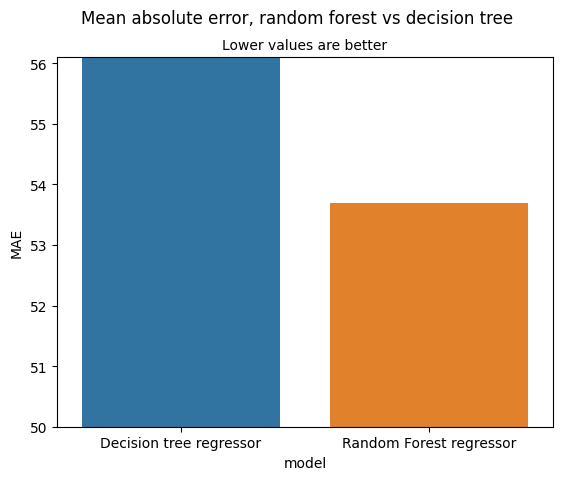

In [4]:
plot1_df = pd.DataFrame({'model':['Decision tree regressor', 'Random Forest regressor'], 
                          'MAE': [dtree_mae, rf_mae ],
                          'r2 score': [dtree_r2, rf_r2]})
plot1_df

plot1 = sns.barplot(data = plot1_df, x = 'model', y = 'MAE')
plt.suptitle('Mean absolute error, random forest vs decision tree', fontsize=12)
plt.title('Lower values are better', fontsize=10)
plt.ylim(50, 56.1)


(0.27, 0.283)

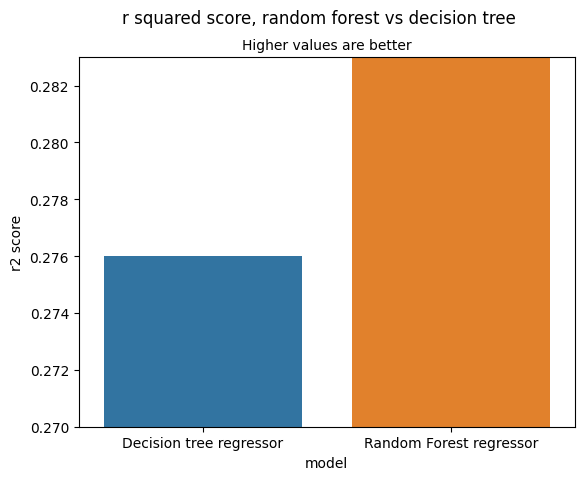

In [5]:
plot2 = sns.barplot(data = plot1_df, x = 'model', y = 'r2 score')
plt.suptitle('r squared score, random forest vs decision tree', fontsize=12)
plt.title('Higher values are better', fontsize=10)
plt.ylim(0.27, 0.283)

The base model decision tree regressor’s r2 score was lower and its MAE was higher than the Random Forest. In other words, our base model random forest performed better than the base model Decision Tree Regressor in both error metrics. We plan on comparing this model with our final model to analyze the performance changes of our final model. The features of the base model will  be used for comparison with the features selected in our final model. We decided to utilize the train test split method for training/testing and allocated 70% of our data to training and the remaining 30% to testing. Our data points are randomly placed (with a seed for reproducibility) into the training and test sets. We feel justified in this method for splitting the data as we have over 41,000 data points, thus giving our model approximately 30,000 data points to learn from and 10,000 to test generalizability. Other methods for training and testing models such as k-fold cross validation would add unnecessary computation and time complexity given the large size of our dataset. The train test split method best balances creating representative training and test sets for our model while minimizing complexity and implementation time. 

Since the Random Forest Regressor performed better than the decision tree regressor, we decided to use it for our final model. We used Recursive Feature Elimination Cross Validation (RFECV) to select the features used in our final model. The first step of RFECV is to rank the features based on feature importance. Unimportant features are then eliminated. From there the remaining features are trained/tested using cross validation. Features are dropped iteratively and the model is repeatedly tested on the new feature set. The end result is the iteration that performed best based on the metric of choice, which is MAE for this project. This was all implemented and conducted using sci-kit learn’s built in feature selection module and RFECV method. After running our code for the feature selection, all columns were selected as important except for the “Shared Room” column. We included a new pair of base models using the updated feature list for another comparison of our model to its baseline. The feature selection suggests that almost all features played an important role in determining the price of an airbnb. Our results below show that both the random forest regressor and decision tree regressor slightly improved their MAE and r2 score after using the new features. 

In [6]:
# feature selection block

subset = airbnb.sample(n=int(41714/800), random_state=23)

X = subset.drop('Price', axis=1)
y = subset['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

categorical_cols = ['City', 'Day', 'Room Type']

numeric_cols = ['Person Capacity', 'Cleanliness Rating', 'Guest Satisfaction', 'Bedrooms',
                'City Center (km)', 'Metro Distance (km)', 'Attraction Index','Restraunt Index']

boolean_cols = ['Shared Room', 'Private Room', 'Superhost', 'Multiple Rooms', 'Business']

preproc = ColumnTransformer(
    transformers=[
        ('one hot', OneHotEncoder(categories='auto'), categorical_cols),
        ('standardize', StandardScaler(), numeric_cols),
        ('bool as is', 'passthrough', boolean_cols)
    ])

X_train_transformed = preproc.fit_transform(X_train)

X_test_transformed = preproc.transform(X_test)

rf_regressor = RandomForestRegressor()

selector = RFECV(rf_regressor, cv=5, scoring='neg_mean_absolute_error')
selector.fit(X_train_transformed, y_train)

selected_features = preproc.transformers_[0][1].get_feature_names_out(categorical_cols).tolist() + numeric_cols + boolean_cols
selected_features = [selected_features[i] for i, support in enumerate(selector.support_) if support]

print("Selected Features: ")
print(selected_features)

Selected Features: 
['City_Amsterdam', 'City_Paris', 'Day_Weekday', 'Day_Weekend', 'Person Capacity', 'Cleanliness Rating', 'Guest Satisfaction', 'Bedrooms', 'City Center (km)', 'Metro Distance (km)', 'Attraction Index', 'Restraunt Index', 'Superhost']


In [7]:
# original columns for reference
print(airbnb.columns)
selected_features

# all columns used except shared room

Index(['City', 'Price', 'Day', 'Room Type', 'Shared Room', 'Private Room',
       'Person Capacity', 'Superhost', 'Multiple Rooms', 'Business',
       'Cleanliness Rating', 'Guest Satisfaction', 'Bedrooms',
       'City Center (km)', 'Metro Distance (km)', 'Attraction Index',
       'Restraunt Index'],
      dtype='object')


['City_Amsterdam',
 'City_Paris',
 'Day_Weekday',
 'Day_Weekend',
 'Person Capacity',
 'Cleanliness Rating',
 'Guest Satisfaction',
 'Bedrooms',
 'City Center (km)',
 'Metro Distance (km)',
 'Attraction Index',
 'Restraunt Index',
 'Superhost']

In [8]:
# random forest using featured selected features:

X = airbnb[['City','Day','Room Type','Person Capacity','Private Room','Cleanliness Rating','Guest Satisfaction','Bedrooms',
            'City Center (km)','Metro Distance (km)','Attraction Index','Restraunt Index','Superhost','Multiple Rooms',
            'Business']]

y = airbnb['Price']  

new_cat_cols = ['City', 'Day', 'Room Type']

new_num_cols = ['Person Capacity', 'Cleanliness Rating', 'Guest Satisfaction', 'Bedrooms',
                'City Center (km)', 'Metro Distance (km)', 'Attraction Index','Restraunt Index']

new_bool_cols = ['Private Room', 'Superhost','Multiple Rooms', 'Business']

preproc2 = ColumnTransformer(
    transformers=[
        ('one hot', OneHotEncoder(categories='auto'), new_cat_cols),
        ('standardize', StandardScaler(), new_num_cols),
        ('bool as is', 'passthrough', new_bool_cols)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

pipeline_rf = Pipeline([('preprocessor', preproc2), ('regressor', RandomForestRegressor())])

pipeline_rf.fit(X_train, y_train)
predictions = pipeline_rf.predict(X_test)

rf_r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f"Mean Absolute Error: {mae}") 
print(f"R-squared score: {rf_r2}")

Mean Absolute Error: 53.676055595563476
R-squared score: 0.3354442640337627


In [9]:
# decision tree regressor with featured selected columns for comparison
pipeline_dtree = Pipeline([('preprocessor', preproc2),('regressor', DecisionTreeRegressor())])

pipeline_dtree.fit(X_train, y_train)
predictions = pipeline_dtree.predict(X_test)

rf_r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared score: {rf_r2}")

Mean Absolute Error: 55.76509193007143
R-squared score: 0.2828530669407393


Now that we have done feature selection, we can tune the hyperparameters of our model. We did this using grid search cross validation. The hyperparameters that we used grid search on were n_estimators, max_depth, and min_samples_split. The grid search cross validation resulted in recommending the default max_depth and min_samples_split values. The n_estimators value was recommended to be changed to 40. 

For our secondary analysis, we decided to use ANOVA to test the statistical significance of the initial findings. ANOVA stands for Analysis Of Variance and is used to determine whether there is a significant difference between the means of multiple groups of data. In the context of this project, using ANOVA will help us determine whether the results for different hyperparameter values are significant or due to random chance. Due to the randomness of splitting, sampling, and small sample size for the hyperparameter tuning, we decided to use a 10% significance level in a 2 tailed p-value test. Meaning results at or below 0.10 or at or above 0.90 are statistically significant. 

In [10]:
# hyper parameter selction 

subset = airbnb.sample(n=int(41714/800), random_state=23)

X = subset[['City','Day','Room Type','Person Capacity','Private Room','Cleanliness Rating','Guest Satisfaction','Bedrooms',
            'City Center (km)','Metro Distance (km)','Attraction Index','Restraunt Index','Superhost','Multiple Rooms',
            'Business']]

y = subset['Price'] 

new_cat_cols = ['City', 'Day', 'Room Type']

new_num_cols = ['Person Capacity', 'Cleanliness Rating', 'Guest Satisfaction', 'Bedrooms',
                'City Center (km)', 'Metro Distance (km)', 'Attraction Index','Restraunt Index']

new_bool_cols = ['Private Room', 'Superhost','Multiple Rooms', 'Business']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

preproc3 = ColumnTransformer(
    transformers=[
        ('one hot', OneHotEncoder(categories='auto'), new_cat_cols),
        ('standardize', StandardScaler(), new_num_cols),
        ('bool as is', 'passthrough', new_bool_cols)
    ])

X_train_transformed = preproc3.fit_transform(X_train)

preproc3_copy = preproc3
preproc3_copy.named_transformers_['one hot'].handle_unknown = 'ignore'

X_test_transformed = preproc3_copy.transform(X_test)

rf_regressor = RandomForestRegressor()

param_grid = {
    'n_estimators': [40, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4, 6],
}

grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_transformed, y_train)

best_estimator = grid_search.best_estimator_

print("Best Estimator:")
print(best_estimator)

Best Estimator:
RandomForestRegressor(max_depth=10, n_estimators=40)


In [11]:
import scipy.stats as stats

results = grid_search.cv_results_
n_estimators_values = param_grid['n_estimators']

n_40 = [results['mean_test_score'][i] for i in range(len(results['params'])) if results['params'][i]['n_estimators'] == 40]
n_100 = [results['mean_test_score'][i] for i in range(len(results['params'])) if results['params'][i]['n_estimators'] == 100]
n_150 = [results['mean_test_score'][i] for i in range(len(results['params'])) if results['params'][i]['n_estimators'] == 150]

# Perform ANOVA test
f_stat1, p_value1 = stats.f_oneway(n_40, n_100, n_150)

# Print the results
print("n_estimators F-statistic:", f_stat1)
print("n_estimators P-value:", p_value1)
print()

depth_none = [results['mean_test_score'][i] for i in range(len(results['params'])) if results['params'][i]['max_depth'] == None]
depth_5 = [results['mean_test_score'][i] for i in range(len(results['params'])) if results['params'][i]['max_depth'] == 5]
depth_10 = [results['mean_test_score'][i] for i in range(len(results['params'])) if results['params'][i]['max_depth'] == 10]
f_stat2, p_value2 = stats.f_oneway(depth_none, depth_5, depth_10)

# Print the results
print("Depth F-statistic:", f_stat2)
print("Depth P-value:", p_value2)
print()

min_2 = [results['mean_test_score'][i] for i in range(len(results['params'])) if results['params'][i]['min_samples_split'] == 2]
min_4 = [results['mean_test_score'][i] for i in range(len(results['params'])) if results['params'][i]['min_samples_split'] == 4]
min_6 = [results['mean_test_score'][i] for i in range(len(results['params'])) if results['params'][i]['min_samples_split'] == 6]
f_stat3, p_value3 = stats.f_oneway(min_2, min_4, min_6)

# Print the results
print("min_samples_split F-statistic:", f_stat3)
print("min_samples_split P-value:", p_value3)
print()

n_estimators F-statistic: 1.0798502492446393
n_estimators P-value: 0.35558357423758985

Depth F-statistic: 0.16921604488223083
Depth P-value: 0.84532504460918

min_samples_split F-statistic: 3.394192904477421
min_samples_split P-value: 0.05033752517342955



# Discussion

### Interpreting the result
As we anticipated, our main finding from this project is that the featured selected, and hyper parameter tuning random forest performed better on the test data than previous iterations of random forest and decision tree regressors. As noted in the proposed solutions section, random forests are ensembles of decision tree regressors that are less prone to overfit and more generalizable. This helps explain the improvement between our final model and the base model. Our feature selection allowed us to drop the variable “shared room” that was distracting our model from more accurate results. When the model was given the feature selected dataset it performed better because it could focus on the features that are relevant for predicting price. The hyperparameter tuning determined which number of estimators, max depth of each estimator, and number of sample splits from each decision led to the lowest error in predicting price. 

The MAE score of the original random forest using all features and un-tuned hyperparameters was 54.04. This means that this model was off by an average of 54.04 from the actual price of the test data. Our final model improved to an MAE of 53.96. There is a 0.08 improvement in MAE. The r2 value of the original random forest was 0.325 and the r2 value of the final model was 0.326. An improvement in r2 scores amounts to the final model explaining the variance in price prediction 0.01% better than the original. This means that the two models explain nearly equal amounts of variability in the independent variable price. The final model achieves a small improvement in MAE and r2 score while being simpler than the original model. The feature selection process led us to drop the “shared rooms” variable giving the model a simpler feature set to train on. The hyperparameter tuning led to the number of estimators in the random forest being dropped from the default value of 100 down to 40. Ensembles with fewer estimators are less likely to overfit to training data so the improvement of our final model on the test set makes sense. The parsimony principle states that when evaluating models the simplest model is preferred. Our final model is both simpler and more accurate than the original random forest. 

Our secondary analysis allowed us to determine whether the results of our hyperparameter tuning process were significant. The final p-values were: n_estimators = 0.902, max_depth = 0.953, and min_samples_split = 0.008. The default ANOVA for scikit-learn is a two tailed significance test and we defined results above 0.89 and below 0.11 as significant. All of our hyperparameter tunings are deemed significant by these standards. The max_depth and min_samples_split are well within the range of statistical significance and the p value for n_estimators is just on the right side of the boundary for significance.

In [12]:
# random forest model with hyper parameter tuning and featured selected features:

X = airbnb[['City','Day','Room Type','Person Capacity','Private Room','Cleanliness Rating','Guest Satisfaction','Bedrooms',
            'City Center (km)','Metro Distance (km)','Attraction Index','Restraunt Index','Superhost','Multiple Rooms',
            'Business']]

y = airbnb['Price']  

new_cat_cols = ['City', 'Day', 'Room Type']

new_num_cols = ['Person Capacity', 'Cleanliness Rating', 'Guest Satisfaction', 'Bedrooms',
                'City Center (km)', 'Metro Distance (km)', 'Attraction Index','Restraunt Index']

new_bool_cols = ['Private Room', 'Superhost','Multiple Rooms', 'Business']

preproc4 = ColumnTransformer(
    transformers=[
        ('one hot', OneHotEncoder(categories='auto'), new_cat_cols),
        ('standardize', StandardScaler(), new_num_cols),
        ('bool as is', 'passthrough', new_bool_cols)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

pipeline_rf = Pipeline([('preprocessor', preproc4), ('regressor', RandomForestRegressor(n_estimators=40))])

pipeline_rf.fit(X_train, y_train)
predictions = pipeline_rf.predict(X_test)

rf_r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f"Mean Absolute Error: {mae}") 
print(f"R-squared score: {rf_r2}")

Mean Absolute Error: 54.82312168853886
R-squared score: 0.3041315934624962


In [13]:
# addition Descion tree regessor with feature selected features for one more comaprison
pipeline_dtree = Pipeline([('preprocessor', preproc2),('regressor', DecisionTreeRegressor())])

pipeline_dtree.fit(X_train, y_train)
predictions = pipeline_dtree.predict(X_test)

rf_r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)


print(f"Mean Absolute Error: {mae}")
print(f"R-squared score: {rf_r2}")

Mean Absolute Error: 56.00578296993887
R-squared score: 0.2770386103481496



### Limitations

There are several limitations to this project. The first has to do with the data. Our data set was based on approximately 41,000 Airbnbs across nine European cities. This is definitely enough data to train/test a machine learning model for predictions in that geographic region but could have limited capacity to generalize outside of Europe for worldwide Airbnb price prediction as trends in Europe may not apply to non-European areas. A next step for this project could be to find data on other region’s Airbnb’s and compare the results of our model on that data with the results on our current dataset. 

Another limitation would be that we did not try a neural network for Airbnb prediction. This was the first machine learning project for most of our group so we wanted to work with models that we fully understood to complete each aspect of the project on time. A next step could be to make/train a neural network for Airbnb price prediction to see if it is more accurate on the test set than our random forest. 

A third limitation was born out of the time it takes to train and test random forests. We used scikit-learn for our project as scikit-learn is what was taught in class. Scikit-learn does not use GPUs meaning it takes a longer time to run complex models than Pytorch or TensorFlow which can use GPUs. We found that doing the feature selection with tens of thousands of data points would take an estimated time of 100 hours per run, based on observed local run times and data counts. To cut down on the time for feature selection we used a sample of 52 data points in feature selection. A next step to work on this limitation would be to do the project using Pytorch or Tensorflow and GPUs for feature selection using all of the data points in the training set. A similar limitation is that we tested 3 different hyperparameter splits for the random forest as testing a wide range of splits would take dozens of hours per run using scikit-learn. The solution to this problem would be to run with Pytorch or Tensorflow and GPUs to test a wider range of hyperparameters on the full training set. 
   

### Ethics & Privacy

Our project does not raise any glaringly obvious ethical or privacy related concerns. Air bnb is a platform in the public domain and the data set we are using is from Kaggle, another open data set platform. Since we are not gathering any personal data on the individuals that own the properties in the data set or any other personally identifiable data (hosts are anonymous in this data set), informed consent is not needed for our project and is not a concern. Using the aforementioned methods to collect the data we are using for this project, we do not have any concerns about immoral data collection methods or any personally identifiable data being used which ensures privacy of the Airbnb host’s whose listings were collected in the data set. There is potential for bias when predicting the prices of air bnb in certain locations, due to historical policies in certain communities, which may have correlated to different prices than other similarly featured listings in different areas. If these historical policies play a factor in our models prediction we will make sure to eliminate these biases from our model and algorithms. Since this project will only be posted on a private github shared with the course staff there are no security concerns, beyond the regular ones shared by github and the course staff (e.g. hacking or glitch that could make the model public or leaked). One possible ethical concern is, if deployed into the real world, how the model could affect the housing and rental market. There is potential for the model to make the market in cities used for data more competitive and potentially expose overpriced air bnb’s. This could result in a loss of business for the hosts of these airbnb and by extension a reduction in income which could affect their standard of living. Beyond this scenario which could only be encountered if the model went into full production, we do not see any other concerns with our project. Overall our project has very few concerns, thus we have followed and considered all factors and guidelines to create an ethical model.


### Conclusion

Our project was designed to predict airbnb prices given data about the Airbnb listings themselves. We used a random forest regressor model and compared it to a decision tree model, as the random forest model yielded better performance. After selecting features, tuning hyperparameters and comparing models, we found that generally, the random forest model was a better model to predict prices than the decision tree model was. The topic of this project, predicting Airbnb prices based on individual listing attributes, fits into other work in the field of price prediction and cognitive science as a whole. Cognitive Science deals a lot with why people think and behave the way they do, in this case, it could be looked into why certain features affect price more than others, and why people tend to value those features more than others. If research were to continue on this topic, it is possible that researchers could look into the impact that Airbnb prices have on overall tourism and monetary profit for cities. This would further extend the usefulness of investigating Airbnb prices and by extension our model, as well as showing the influence of the industry overall. 

# Footnotes
<a name="Barronnote"></a>1.[^](#Barron): Barron, K., Kung, E., & Proserpio, D. (2021, September 17). Research: When airbnb listings in a city increase, so do rent prices. *Harvard Business Review*. https://hbr.org/2019/04/research-when-airbnb-listings-in-a-city-increase-so-do-rent-prices<br> 
<a name="Kerennote"></a>2.[^](#Keren): Keren Horn, Mark Merante, Is home sharing driving up rents? Evidence from Airbnb in Boston, *Journal of Housing Economics*, Volume 38, 2017, Pages 14-24, ISSN 1051-1377, https://doi.org/10.1016/j.jhe.2017.08.002.<br>
<a name="Pereznote"></a>3. [^](#Perez): Perez-Sanchez, V., Serrano-Estrada, L., Marti, P., & Mora-Garcia, R.-T. (2018). The What, Where, and Why of Airbnb Price Determinants. *Sustainability*, 10(12), 4596. https://doi.org/10.3390/su10124596 <br>
<a name="Nguyennote"></a>4.[^](#Nguyen): Nguyen, Quynh, "A Study of Airbnb as a Potential Competitor of the Hotel Industry" (2014). *UNLV Theses, Dissertations, Professional Papers, and Capstones*. 2618. http://dx.doi.org/10.34917/8349601lem <br>
<a name="Gutierreznote"></a>5.[^](#Gutierrez): Gutierrez, J., Carlos, J., Romanillos, G., & Henar, M. (2016). Airbnb in tourist cities: Comparing spatial patterns of hotels and peer-to-peer accommodation. *ArXiv*. https://doi.org/10.1016/j.tourman.2017.05.003 <br>
<a name="Sansnote"></a>6.[^](#Sans): Sans, A. A., & Domínguez, A. Q. (2016, May 3). 13. Unravelling airbnb: Urban perspectives from Barcelona. De Gruyter. https://www.degruyter.com/document/doi/10.21832/9781845415709-015/html <br>
